### **ANALYTICS FOR UNSTRUCTURED DATA ASSIGNMENT 1**

Team Members:
Joseph Bridges (jhb2854), Cate Dombrowski (cd37589), Jordan Ehlinger (je28596), Amey Ghate (ag84957), Alicia Wilson (amw6577)

**Before performing any tasks, we have scraped 6783 comments from Edmunds.com starting from page 300 to 435**

url - https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

In [1]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
Hit:1 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backpor

In [2]:
wd = webdriver.Chrome(options=chrome_options)

In [3]:
import pandas as pd
import datetime
pageDf = pd.DataFrame(columns=['Date','Message'])
def crawler(pageNumber):
  print('Parsing Page Number : {}'.format(pageNumber))
  pageString = '/p{}'
  urlString = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
  if(int(pageNumber)>1):
    urlString = urlString+pageString.format(pageNumber)
  wd.get(urlString)

  #Get details pertaining to the whole comment box including the page numbers in one element
  aggregateElements = wd.find_element(by=By.CLASS_NAME, value='CommentsWrap')

  #Extract Comment Box
  elements = aggregateElements.find_elements(by=By.CLASS_NAME, value='Comment')
  pagingDf = parsePage(elements,pageDf)

  #Extract the next page number box
  pageElements = aggregateElements.find_element(by=By.CLASS_NAME, value='P.PagerWrap')
  hrefs = pageElements.find_elements(by=By.TAG_NAME, value='a')
  print('Parsing complete for Page Number : {}'.format(pageNumber))

  #Locate the index of current page and check whether its the last page of the scraper
  pageList = [x.text for x in hrefs]
  pageIndex = pageList.index(pageNumber)

  #The last/terminal page will not have a next pageNumber, hence we must break the recursion loop there
  if len(hrefs[pageIndex+1].text)==0:
    return pagingDf
  else:
    next_page = hrefs[pageIndex+1].text
    print('Next Page is : {}'.format(next_page))
    return crawler(next_page)

In [4]:
def parsePage(pageElements, pageDf):
  for element in pageElements:
    userComment = ''

    #When dealing with blockquote texts, it's important to avoid redundancy by eliminating previous comments when a user responds to them. This involves substituting those specific strings with empty values.
    if(len(element.find_elements(by=By.CLASS_NAME,value='blockquote'))>0):
      blockquoteText = element.find_element(by=By.CLASS_NAME, value='blockquote').text
      elementText = element.find_element(by=By.CLASS_NAME, value='Message.userContent').text
      userComment = elementText.replace(blockquoteText,'').strip()

    else:
      userComment = element.find_element(by=By.CLASS_NAME,value = 'Message.userContent').text

    timeElement = element.find_element(by=By.TAG_NAME, value='time')
    date = timeElement.get_attribute('title')

    #Get data in required format
    tempDate = datetime.datetime.strptime(date, '%B %d, %Y %I:%M%p')
    time = tempDate.strftime('%Y-%m-%d %H:%M:%S')
    pageDf.loc[len(pageDf.index)] = [time,userComment]

  return pageDf

In [5]:
df = crawler('300')

Parsing Page Number : 300
Parsing complete for Page Number : 300
Next Page is : 301
Parsing Page Number : 301
Parsing complete for Page Number : 301
Next Page is : 302
Parsing Page Number : 302
Parsing complete for Page Number : 302
Next Page is : 303
Parsing Page Number : 303
Parsing complete for Page Number : 303
Next Page is : 304
Parsing Page Number : 304
Parsing complete for Page Number : 304
Next Page is : 305
Parsing Page Number : 305
Parsing complete for Page Number : 305
Next Page is : 306
Parsing Page Number : 306
Parsing complete for Page Number : 306
Next Page is : 307
Parsing Page Number : 307
Parsing complete for Page Number : 307
Next Page is : 308
Parsing Page Number : 308
Parsing complete for Page Number : 308
Next Page is : 309
Parsing Page Number : 309
Parsing complete for Page Number : 309
Next Page is : 310
Parsing Page Number : 310
Parsing complete for Page Number : 310
Next Page is : 311
Parsing Page Number : 311
Parsing complete for Page Number : 311
Next Page i

In [6]:
df.head()

,Date,Message
0,2013-01-11 11:20:00,During my family visit in the Old Country this...
1,2013-01-11 11:22:00,A reporter would like to speak to a woman who ...
2,2013-01-11 12:17:00,In 2001 I was in Italy a couple of weeks for b...
3,2013-01-11 12:31:00,Thank you. That was a helpful review. I almost...
4,2013-01-11 13:32:00,"Perhaps you're right, but VAG's 1.9TDI (previo..."


In [7]:
df.to_csv('ScrappedComments.csv',index=False)

In [ ]:
#from google.colab import files
#files.download('ScrappedComments.csv')

**TASK A**

Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.

In [8]:
from nltk.tokenize.sonority_sequencing import punctuation
import re
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from collections import Counter
from scipy.stats import zipf
nltk.download('punkt')

#re: Provides regular expression capabilities.
#nltk: Offers a wide range of tools for natural language processing.
#RegexpTokenizer and word_tokenize: Functions/classes for tokenizing text.
#Counter: A class for counting elements in a collection.
#zipf: A class for working with the Zipf distribution.
#nltk.download('punkt'): Downloads NLTK data needed for tokenization.

#Removing entries where comments are not present
df = df.dropna(subset=['Message'],axis=0)
#Lowercasing the message text
df['Message'] = df['Message'].apply(lambda x: x.lower())
#Remove Punctuation
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#'
df['Message'] = df['Message'].apply(lambda x: re.sub('['+punctuation + ']+', ' ', x))
#Remove the extra spacing
df['Message'] = df['Message'].apply(lambda x: re.sub('\s+', ' ', x))
#Tokenize the words
df['Message_tokens'] = df.Message.apply(word_tokenize)

# Flatten the list of tokenized words from the 'Message_tokens' column
flattened_words = [word for message_tokens in df['Message_tokens'] for word in message_tokens]
# Calculate the 100 most common words along with their frequencies
hundred_most_common_words = Counter(flattened_words).most_common(100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
print('Hundred most common words:')
hundred_most_common_words

Hundred most common words:


[('the', 34966),
 ('a', 16458),
 ('i', 16397),
 ('to', 14483),
 ('and', 14290),
 ('of', 10597),
 ('it', 10047),
 ('is', 9299),
 ('that', 8689),
 ('in', 8641),
 ('for', 6699),
 ('you', 5580),
 ('s', 5564),
 ('with', 5449),
 ('on', 5110),
 ('but', 4804),
 ('t', 4559),
 ('my', 4422),
 ('have', 4259),
 ('be', 4205),
 ('car', 4163),
 ('not', 4146),
 ('they', 3925),
 ('as', 3844),
 ('was', 3833),
 ('are', 3769),
 ('at', 3576),
 ('or', 3432),
 ('if', 2890),
 ('so', 2588),
 ('an', 2588),
 ('this', 2546),
 ('like', 2511),
 ('would', 2495),
 ('one', 2377),
 ('more', 2366),
 ('can', 2319),
 ('cars', 2279),
 ('bmw', 2256),
 ('just', 2175),
 ('all', 2116),
 ('has', 2031),
 ('will', 2028),
 ('about', 1989),
 ('new', 1968),
 ('what', 1857),
 ('than', 1850),
 ('get', 1847),
 ('we', 1839),
 ('had', 1799),
 ('me', 1793),
 ('from', 1779),
 ('there', 1703),
 ('up', 1680),
 ('audi', 1661),
 ('m', 1643),
 ('no', 1625),
 ('out', 1584),
 ('think', 1539),
 ('some', 1532),
 ('even', 1512),
 ('when', 1508),
 ('d

After performing some data cleaning, we've obtained a list of the 100 most frequently occurring words. Our next step is to create a plot showing the word frequencies, including the Zipf frequency. The Zipf frequency represents the word's frequency ratio compared to the rest of the text corpus. The cleaning process involved removing punctuation, extra spaces, and converting the text to lowercase.

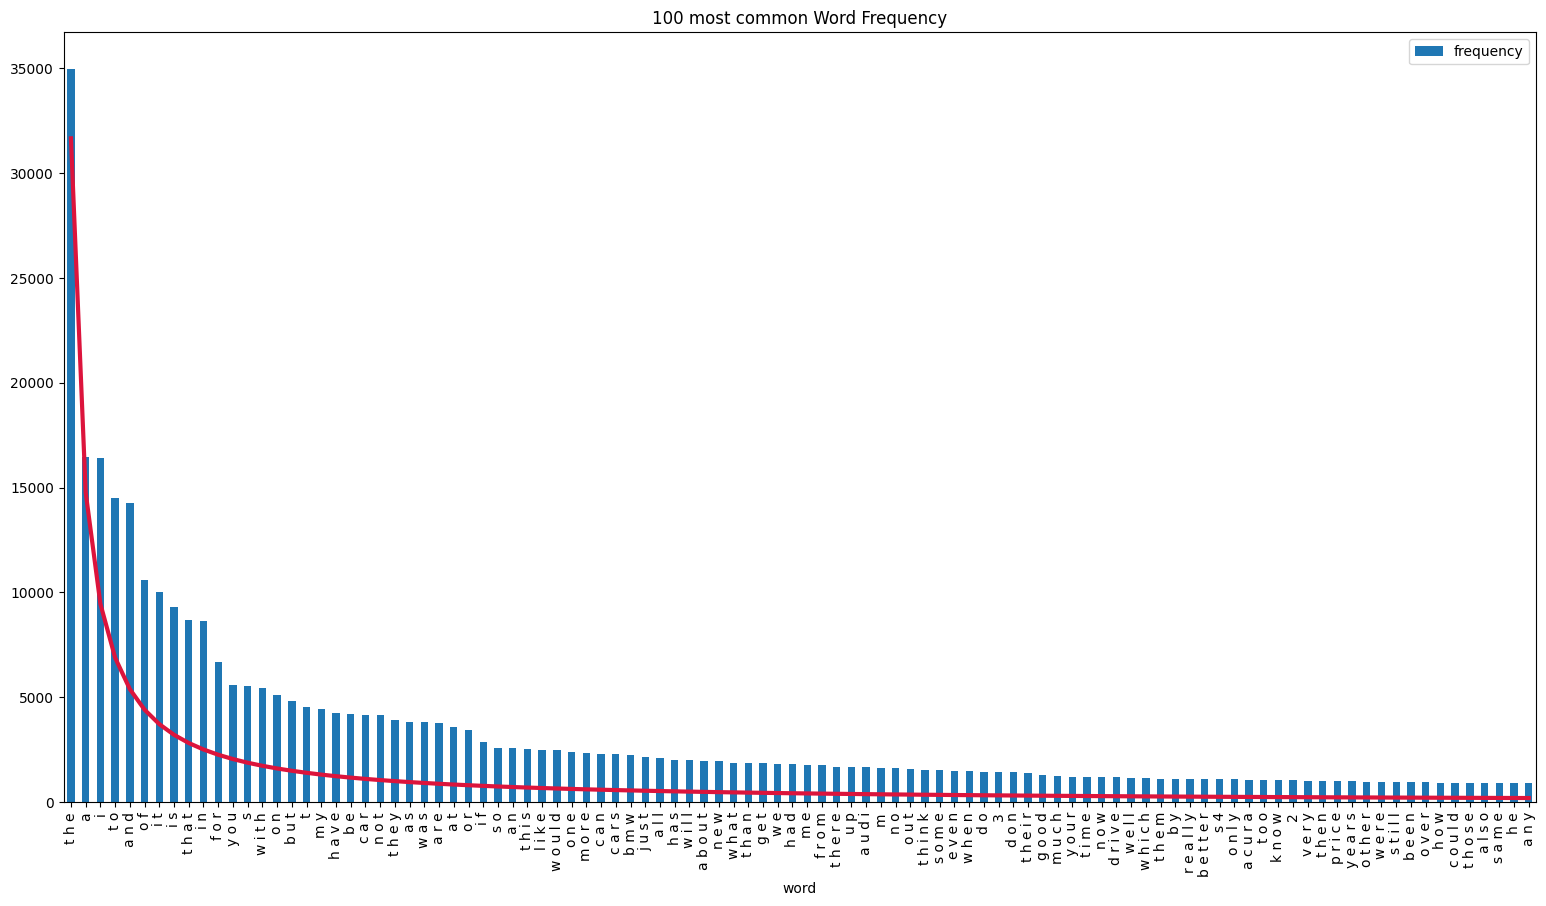

In [10]:
#Zipf's law for plotting the 100 most common words
word_count = pd.DataFrame(data = hundred_most_common_words, columns=['word','frequency'])

#Convert the list to string
word_count['word'] = word_count['word'].apply(' '.join) #This step is necessary for making the x-axis labels in the bar plot more readable
#Plot the word count graph
plt = word_count.sort_values('frequency',ascending=False).plot.bar(x='word',y='frequency',title='100 most common Word Frequency',figsize=(19,10))
alpha = 1.1
total = sum([n for _, n in hundred_most_common_words])
plt.plot(range(len(hundred_most_common_words)), [zipf.pmf(p, alpha) * total for p in range(1, len(hundred_most_common_words) + 1)], color='crimson', lw=3)
#plt.savefig('wordcount.png')

<font color = red> <br>
*Zipf's Law Notes:*
Frequency of a word with rank r, x(r), is inversely proportional to its rank. <br>
$r*x(r) = c$ (constant) <br>
<br>
<font color = black>
In order to test if the data support Zipf’s law econometrically, we have also created a table to show each word frequency and rank. From here, we created more columns:

- *Zipf's Predicted Frequency* shows what we would expect the frequency to be for each word, after the top ranked word. This was calculated using c = 90900 (the 100th word frequency * rank)
- *Rank x Frequency* shows what the actual c values for each word is. In a perfect world this number should be the same for each word, since Zipf's law states that there is an inversely proportional relationship for each word and rank, however, as you can see this is not the case.

In [11]:
df_top_100 = pd.DataFrame(hundred_most_common_words, columns=['Word', 'Frequency'])
df_top_100['Rank'] = range(1, df_top_100.shape[0] + 1)

df_top_100[:2]

#C = the frequency of the first rank:
c = 90900

# Using the Zipf's law formula
df_top_100['Zipf Predicted Frequency (c = 90900)'] = c / df_top_100['Rank']

# To display the updated DataFrame
df_top_100

df_top_100['Zipf Predicted Frequency (c = 90900)'] = c / df_top_100['Rank']
df_top_100['Rank x Frequency'] = df_top_100['Rank'] * df_top_100['Frequency']
df_top_100

,Word,Frequency,Rank,Zipf Predicted Frequency (c = 90900),Rank x Frequency
0,the,34966,1,90900.000000,34966
1,a,16458,2,45450.000000,32916
2,i,16397,3,30300.000000,49191
3,to,14483,4,22725.000000,57932
4,and,14290,5,18180.000000,71450
...,...,...,...,...,...
95,those,917,96,946.875000,88032
96,also,914,97,937.113402,88658
97,same,914,98,927.551020,89572
98,he,911,99,918.181818,90189


**Graph and Table Observations:**
As the table shows, the rank x freqeuncy actually increases with the rank: for the word 'the' this number is 34966, but for 'any' it is 90900. If this data completely abided by Zipf's Law we would expect these numbers to be the same. For this to have been the case, the word 'the' would have needed an increase in frequency from its actual (34966) to Zipf's predicted frequency (90900). This observation corresponds to the graph as we see the red line leveling off far lower than the height of the blue bars.

Subsequently, we computed the logarithm of the word frequencies and created a plot where these logarithmic values are plotted against the words, arranged in descending order according to their rank.

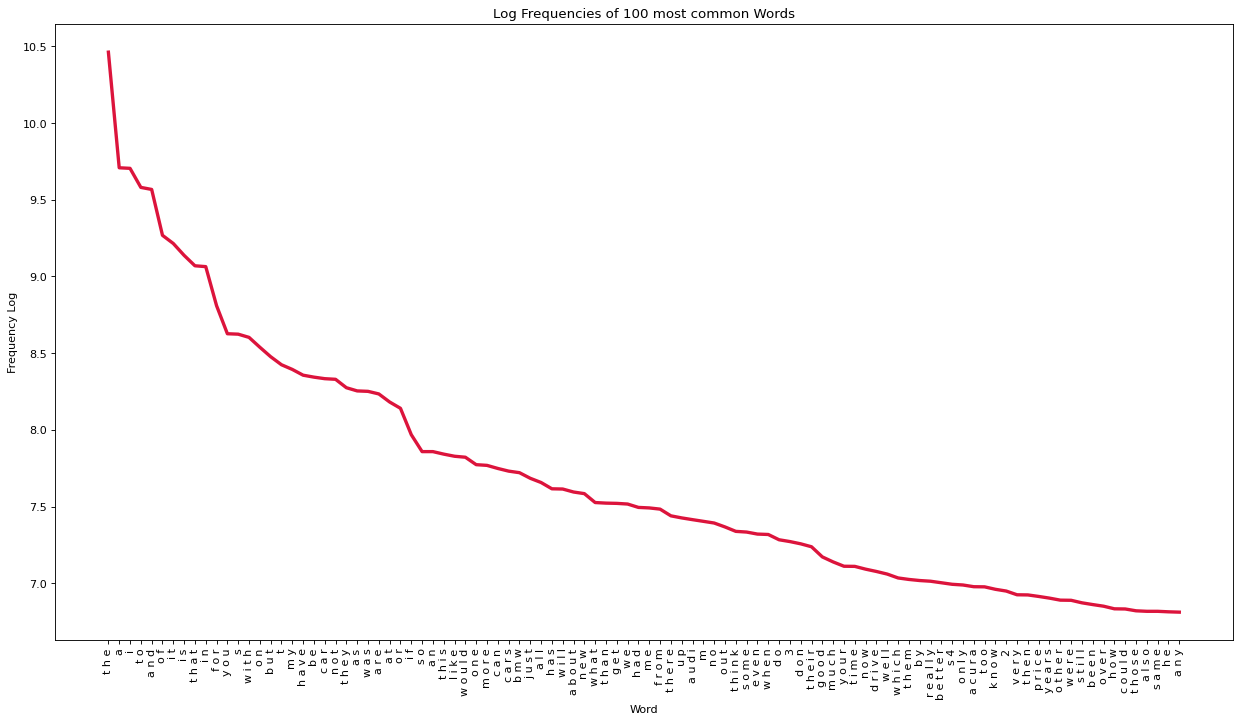

In [12]:
import matplotlib.pyplot as plt
import math
word_count = pd.DataFrame(data = hundred_most_common_words, columns=['word','frequency'])
word_count['log_frequency'] = word_count['frequency'].apply(lambda x: math.log(int(x)))

#Convert the list to string
word_count['word'] = word_count['word'].apply(' '.join) #This step is necessary for making the x-axis labels in the bar plot more readable
#Plot the word count graph
plt.figure(figsize=(19, 10), dpi=80)
plt.plot(word_count['word'], word_count['log_frequency'], color='crimson', lw=3)
plt.title('Log Frequencies of 100 most common Words')
plt.xlabel('Word')
plt.ylabel('Frequency Log')
plt.xticks(rotation = 90)
plt.show()
#plt.savefig('wordcount_log.png')

**TASK B**

Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file. Even if a brand (e.g., BMW) is mentioned multiple times in a message, it should be counted as 1.   

In [13]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
data = df.copy()
from google.colab import files

# Upload the CSV file
# We are utilizing the car_models_and_brands.csv file which was posted on Canvas
uploaded = files.upload()

Saving car_models_and_brands.csv to car_models_and_brands.csv


In [15]:
# Read the uploaded file
brand_model = pd.read_csv('car_models_and_brands.csv')
brand_model.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [16]:
# Select the 'Brand' and 'Model' columns, drop duplicates, and convert 'Model' to lowercase
brand_model = brand_model[['Brand','Model']].drop_duplicates()
brand_model['Model'] = brand_model['Model'].apply(lambda x: x.lower())

# Convert 'Message' column to lowercase
data['Message'] = data['Message'].astype(str)
data['Message'] = data['Message'].apply(lambda x: x.lower())
brand_model.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [17]:
brand_model_set = set(brand_model['Brand'])
brand_model_set

{'acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'car',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'honda',
 'hyndai kia',
 'hyundai',
 'hyundai,',
 'hyundai.',
 'infiniti',
 'kia',
 'kia,',
 'kia.',
 'lincoln',
 'mazda',
 'mercedes',
 'mercedes benz',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'nissan.',
 'pontiac',
 'problem',
 'saturn',
 'seat',
 'sedan',
 'subaru',
 'suzuki',
 'toyata',
 'toyota',
 'volkswagen',
 'volkwagen',
 'volvo'}

In [18]:
#Code to replace the models in the Message with brand names
def brandMapping(s):
  for index,row in brand_model.iterrows():
    if(row[1] in s):
      s = s.replace(row[1],row[0])
  return s

data['MappedMessage'] = data['Message'].map(brandMapping)
data

,Date,Message,Message_tokens,MappedMessage
0,2013-01-11 11:20:00,during my family visit in the old country this...,"[during, my, family, visit, in, the, old, coun...",during my family visit in the old country this...
1,2013-01-11 11:22:00,a reporter would like to speak to a woman who ...,"[a, reporter, would, like, to, speak, to, a, w...",a retoyotar would like to speak to a woman who...
2,2013-01-11 12:17:00,in 2001 i was in italy a couple of weeks for b...,"[in, 2001, i, was, in, italy, a, couple, of, w...",in 2001 i was in italy a couple of weeks for b...
3,2013-01-11 12:31:00,thank you that was a helpful review i almost f...,"[thank, you, that, was, a, helpful, review, i,...",thank you that was a helpful review i almost f...
4,2013-01-11 13:32:00,perhaps you re right but vag s 1 9tdi previous...,"[perhaps, you, re, right, but, vag, s, 1, 9tdi...",perhaps you re right but vag s 1 9tdi previous...
...,...,...,...,...
6778,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...
6779,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...
6780,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...
6781,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...


In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')      # Download the 'punkt' dataset for tokenization
nltk.download('stopwords')  # Download the 'stopwords' dataset

# Get a list of English stopwords from NLTK
stop = stopwords.words('english')

# Tokenize each 'MappedMessage' and remove punctuation
data['tokenized_message'] = data['MappedMessage'].apply(lambda s: word_tokenize(re.sub(r'[^\w\s]', ' ', s)))

# Display the updated DataFrame 'data'
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Message,Message_tokens,MappedMessage,tokenized_message
0,2013-01-11 11:20:00,during my family visit in the old country this...,"[during, my, family, visit, in, the, old, coun...",during my family visit in the old country this...,"[during, my, family, visit, in, the, old, coun..."
1,2013-01-11 11:22:00,a reporter would like to speak to a woman who ...,"[a, reporter, would, like, to, speak, to, a, w...",a retoyotar would like to speak to a woman who...,"[a, retoyotar, would, like, to, speak, to, a, ..."
2,2013-01-11 12:17:00,in 2001 i was in italy a couple of weeks for b...,"[in, 2001, i, was, in, italy, a, couple, of, w...",in 2001 i was in italy a couple of weeks for b...,"[in, 2001, i, was, in, italy, a, couple, of, w..."
3,2013-01-11 12:31:00,thank you that was a helpful review i almost f...,"[thank, you, that, was, a, helpful, review, i,...",thank you that was a helpful review i almost f...,"[thank, you, that, was, a, helpful, review, i,..."
4,2013-01-11 13:32:00,perhaps you re right but vag s 1 9tdi previous...,"[perhaps, you, re, right, but, vag, s, 1, 9tdi...",perhaps you re right but vag s 1 9tdi previous...,"[perhaps, you, re, right, but, vag, s, 1, 9tdi..."
...,...,...,...,...,...
6778,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...,"[there, s, speculation, that, the, acura, name..."
6779,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...,"[if, they, won, t, bring, back, acura, the, ac..."
6780,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,..."
6781,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...,"[fordx4, how, do, you, like, your, lincoln, li..."


In [20]:
# Remove stopwords from each tokenized message
data['tokenized_message'] = data['tokenized_message'].apply(lambda words: [x for x in words if x not in stop])

# Create a sorted list of unique words in each tokenized message
data['tokenized_message_unique'] = data['tokenized_message'].apply(lambda s: sorted(set(s)))

data['Tokenized_message_trial'] = data['tokenized_message'].apply(lambda s: (set(s)))

# Display the updated DataFrame 'data'
data

,Date,Message,Message_tokens,MappedMessage,tokenized_message,tokenized_message_unique,Tokenized_message_trial
0,2013-01-11 11:20:00,during my family visit in the old country this...,"[during, my, family, visit, in, the, old, coun...",during my family visit in the old country this...,"[family, visit, old, country, xmas, drove, dad...","[1, 1000, 2005, 6, 7, 8, 9tdi, accelerating, a...","{left, transmissions, economy, run, visit, dri..."
1,2013-01-11 11:22:00,a reporter would like to speak to a woman who ...,"[a, reporter, would, like, to, speak, to, a, w...",a retoyotar would like to speak to a woman who...,"[retoyotar, would, like, speak, woman, new, le...","[11, 2013, 3, 6, com, contact, daytime, descri...","{daytime, et, like, edmunds, send, new, owner,..."
2,2013-01-11 12:17:00,in 2001 i was in italy a couple of weeks for b...,"[in, 2001, i, was, in, italy, a, couple, of, w...",in 2001 i was in italy a couple of weeks for b...,"[2001, italy, couple, weeks, business, drove, ...","[150, 2001, 5, 7, 8, also, around, auto, belie...","{believe, gears, disappearing, freeways, roads..."
3,2013-01-11 12:31:00,thank you that was a helpful review i almost f...,"[thank, you, that, was, a, helpful, review, i,...",thank you that was a helpful review i almost f...,"[thank, helpful, review, almost, forgot, turbo...","[300h, ago, almost, available, bimmer, buick, ...","{good, thank, widely, buick, like, turbo, cons..."
4,2013-01-11 13:32:00,perhaps you re right but vag s 1 9tdi previous...,"[perhaps, you, re, right, but, vag, s, 1, 9tdi...",perhaps you re right but vag s 1 9tdi previous...,"[perhaps, right, vag, 1, 9tdi, previous, gen, ...","[1, 100k, 4, 6, 8, 9tdi, abot, abuse, acclaime...","{great, mower, gen, love, friendly, limits, cy..."
...,...,...,...,...,...,...,...
6778,2020-07-26 15:42:00,there s speculation that the ilx name might be...,"[there, s, speculation, that, the, ilx, name, ...",there s speculation that the acura name might ...,"[speculation, acura, name, might, retired, new...","[acura, back, bring, car, might, name, new, po...","{back, acura, speculation, possibly, new, migh..."
6779,2020-07-26 15:47:00,if they won t bring back integra the rsx is a ...,"[if, they, won, t, bring, back, integra, the, ...",if they won t bring back acura the acura is a ...,"[bring, back, acura, acura, good, 2nd, choice,...","[2nd, acura, back, bring, choice, even, good, ...","{hatch, 2nd, good, choice, back, maybe, acura,..."
6780,2020-07-26 15:54:00,yes i d like to see acura bring back a hatchba...,"[yes, i, d, like, to, see, acura, bring, back,...",yes i d like to see acura bring back a hatchba...,"[yes, like, see, acura, bring, back, hatchback...","[2021, acura, also, back, bring, calendar, cou...","{lineup, calendar, like, x1, hatchback, far, b..."
6781,2021-05-05 18:35:00,explorerx4 how do you like your lincoln mkz a...,"[explorerx4, how, do, you, like, your, lincoln...",fordx4 how do you like your lincoln lincoln a...,"[fordx4, like, lincoln, lincoln, may, seen, fr...","[2018, far, fordx4, friend, got, like, lincoln...","{got, may, friend, 2018, loves, like, seen, mi..."


In [21]:
# Calculate the frequency of unique words
freq_words = data['tokenized_message_unique'].sum()
all_items = []
for s in data['Tokenized_message_trial']:
    all_items.extend(s)

# Now you can use nltk.FreqDist or any other counting method on all_items list
freq_trial = nltk.FreqDist(all_items)
# Create a frequency distribution using NLTK's FreqDist
freq_dist = nltk.FreqDist(freq_words)
# Display the frequency distribution
print(freq_dist,freq_trial)

<FreqDist with 20072 samples and 274887 outcomes> <FreqDist with 20072 samples and 274887 outcomes>


In [ ]:
freq_dist

FreqDist({'car': 2775, 'like': 1693, 'bmw': 1565, 'one': 1559, 'would': 1504, 'get': 1284, 'new': 1260, 'think': 1213, 'audi': 1147, 'even': 1010, ...})

In [ ]:
freq_trial

FreqDist({'car': 2775, 'like': 1693, 'bmw': 1565, 'one': 1559, 'would': 1504, 'get': 1284, 'new': 1260, 'think': 1213, 'audi': 1147, 'even': 1010, ...})

In [22]:
# Create a dictionary of brand frequencies from the frequency distribution
brands_dict = {brand_key: freq_dist[brand_key] for brand_key in freq_dist.keys() if brand_key in brand_model_set}

# Create a DataFrame from the dictionary
car_brands = pd.DataFrame.from_dict(brands_dict, orient='index').reset_index()
car_brands.columns = ["brand", "word_frequency"]

# Sort the DataFrame by word frequency in descending order
car_brands.sort_values("word_frequency", ascending=False, inplace=True)

# Display the dictionary of brand frequencies
brands_dict

{'audi': 1147,
 'bmw': 1565,
 'car': 2775,
 'honda': 602,
 'problem': 310,
 'subaru': 122,
 'buick': 114,
 'toyota': 330,
 'volkswagen': 345,
 'infiniti': 350,
 'nissan': 117,
 'lincoln': 96,
 'suzuki': 6,
 'sedan': 431,
 'ford': 248,
 'hyundai': 230,
 'kia': 143,
 'mazda': 117,
 'chevrolet': 170,
 'mercedes': 286,
 'pontiac': 25,
 'seat': 401,
 'acura': 774,
 'cadillac': 275,
 'volvo': 200,
 'chrysler': 82,
 'dodge': 82,
 'mercury': 12,
 'saturn': 3,
 'mitsubishi': 2}

<Axes: title={'center': 'Brand Frequency Distribution'}, xlabel='Brand Names', ylabel='Frequency'>

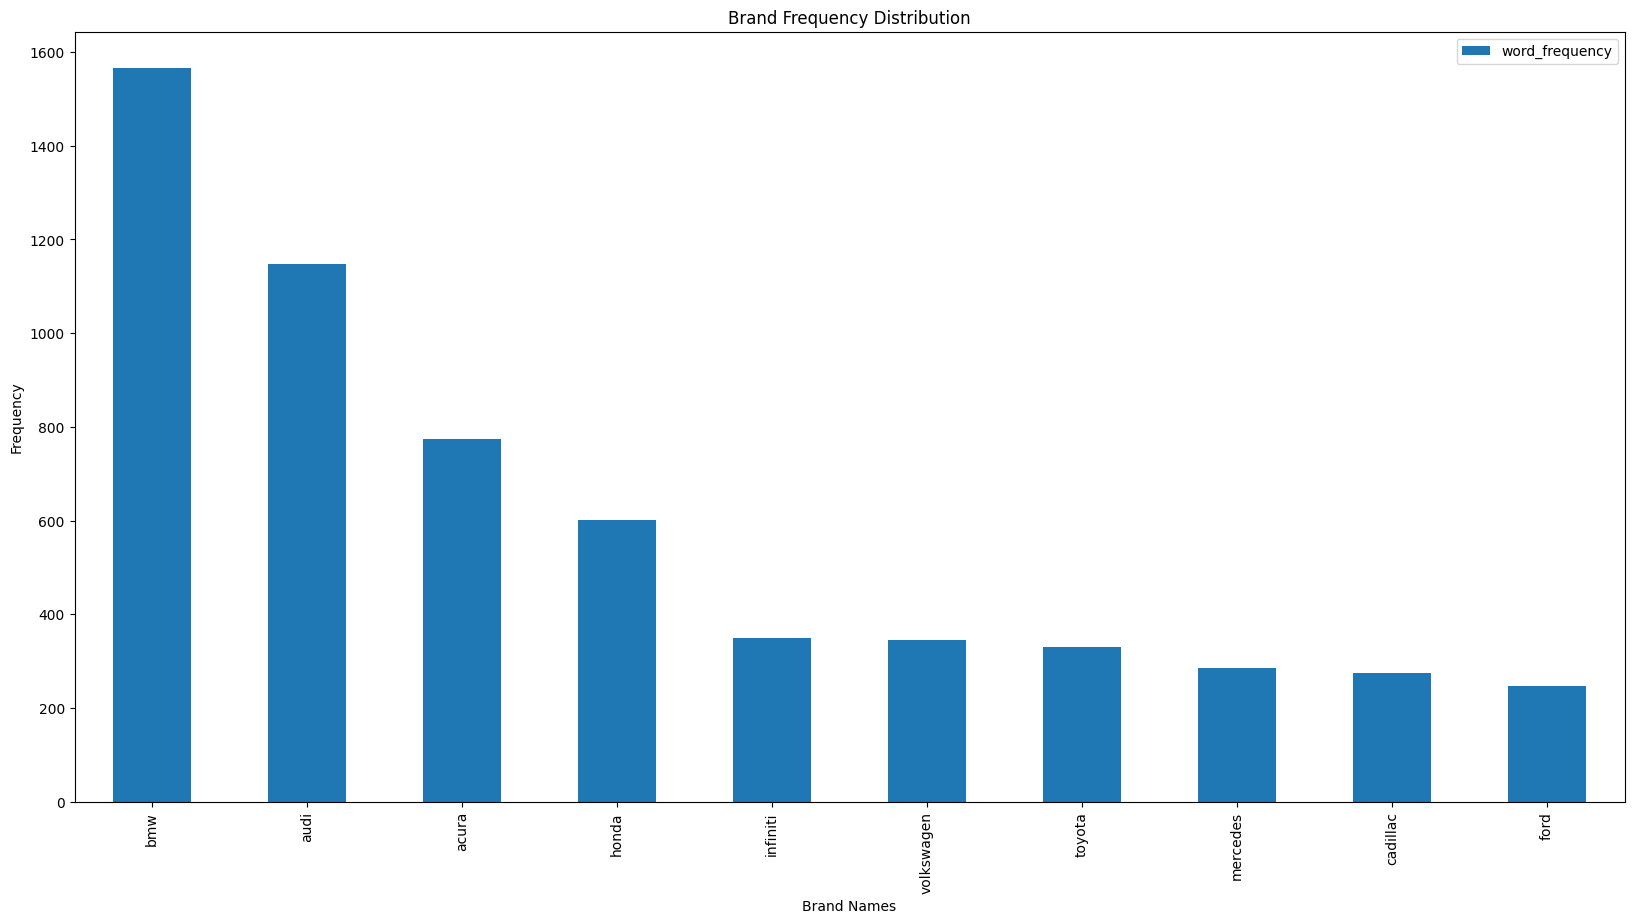

In [23]:
## Removing noise words from the car_brands DataFrame
# Remove rows with noise words from the 'car_brands' DataFrame
car_brands = car_brands[~car_brands.brand.isin(['car', 'sedan', 'seat', 'problem'])]

# Get the top 10 car brands by word frequency
top10_car_brands = car_brands.sort_values(by="word_frequency", ascending=False).head(10)

# Display the top 10 car brands DataFrame
top10_car_brands

# Set the index of 'top10_car_brands' DataFrame to 'brand'
top10_car_brands = top10_car_brands.set_index('brand')

# Plot the graph using pandas plotting
top10_car_brands.plot(kind="bar", xlabel="Brand Names", ylabel="Frequency", title='Brand Frequency Distribution', figsize=(20, 10))


***These are the top 10 brands that we found out and we have also plotted the frequency of it in the comments.***

In [24]:
top10_car_brands

,word_frequency
brand,
bmw,1565
audi,1147
acura,774
honda,602
infiniti,350
volkswagen,345
toyota,330
mercedes,286
cadillac,275


**TASK C**

Calculate lift ratios for associations between the top-10 brands identified in Task A. (You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. In your code, ensure that a message is not counted in the lift calculations if the mentions of two brands are separated by more than, say, 5 or 7 words.

Note : Initially, we limited the frame size to 5-7 and 15 (two different versions). We have left the 15 word parameter code hashtagged, however, decided not to run this. This was because our lift values were extremely low, and we did not draw effective comparisons when visualizing in the MDS plot. As a result, we have decided to take the frame away and consider any comparisons within the same message. This is because the comments by consumers were not too long, and we assumed that if consumers are talking about two brands in their comments, no matter how far apart they are, these are likely comparisons.

In [25]:
#Function to calculate Lift Ratios

def lift_analysis(item_a,item_b, message_tokens):
  freq_item_a = 0
  freq_item_b = 0
  freq_item_a_and_b = 0
  total_messages = len(message_tokens)

  for tokens in message_tokens:
    if item_a in tokens:
      freq_item_a += 1
    if item_b in tokens:
      freq_item_b += 1
    if item_a in tokens and item_b in tokens:
      freq_item_a_and_b += 1

  if freq_item_a == 0:
    return (float(total_messages) * freq_item_a_and_b) / freq_item_b
  elif freq_item_b == 0:
    return (float(total_messages) * freq_item_a_and_b) / freq_item_a
  else:
    return (float(total_messages) * freq_item_a_and_b) / (freq_item_a * freq_item_b)


In [ ]:
# def lift_analysis(item_a, item_b, message_tokens):
#     freq_item_a = 0
#     freq_item_b = 0
#     freq_item_a_and_b = 0
#     total_messages = len(message_tokens)

#     for tokens in message_tokens:
#         if item_a in tokens:
#             freq_item_a += 1
#         if item_b in tokens:
#             freq_item_b += 1
#         if item_a in tokens and item_b in tokens:
#             indices_item_a = [index for index, word in enumerate(tokens) if word == item_a]
#             indices_item_b = [index for index, word in enumerate(tokens) if word == item_b]

#             for index_a in indices_item_a:
#                 for index_b in indices_item_b:
#                     if abs(index_a - index_b) <= 15:
#                         freq_item_a_and_b += 1
#                         break

#     if freq_item_a == 0:
#         return (float(total_messages) * freq_item_a_and_b) / freq_item_b
#     elif freq_item_b == 0:
#         return (float(total_messages) * freq_item_a_and_b) / freq_item_a
#     else:
#         return (float(total_messages) * freq_item_a_and_b) / (freq_item_a * freq_item_b)


In [26]:
#Utilizing the defined function to calculate the lift with revelant parameters
top10_car_brands = top10_car_brands.reset_index()
lift_df = []
for index, a in top10_car_brands.iterrows():
  for index, b in top10_car_brands.iterrows():
    lift_df.append(lift_analysis(a.brand,b.brand,data.Tokenized_message_trial))

top10_car_brands

,brand,word_frequency
0,bmw,1565
1,audi,1147
2,acura,774
3,honda,602
4,infiniti,350
5,volkswagen,345
6,toyota,330
7,mercedes,286
8,cadillac,275
9,ford,248


**Lift Values**

In [31]:
import numpy as np
import pandas as pd

# Convert the list into a matrix format
lift_analysis = np.reshape(lift_df, (10, 10))

# Set the diagonal and all values below the diagonal to NaN
tril_indices = np.tril_indices_from(lift_analysis)
lift_analysis[tril_indices] = np.nan

lift_data = pd.DataFrame(data=lift_analysis)

# Renaming columns and rows using the brands from top10_car_brands
for counter in range(10):
    lift_data = lift_data.rename(columns={counter: top10_car_brands.iloc[counter, 0]})
    lift_data = lift_data.rename(index={counter: top10_car_brands.iloc[counter, 0]})

lift_data


,bmw,audi,acura,honda,infiniti,volkswagen,toyota,mercedes,cadillac,ford
bmw,NaN,1.82134,1.411130,1.144743,2.129942,1.268848,1.392193,3.015744,1.922802,1.502984
audi,NaN,NaN,2.200442,1.787859,2.821674,2.554028,1.738266,3.308357,2.967596,1.216121
acura,NaN,NaN,NaN,3.508338,3.705736,1.397090,1.779269,2.819049,2.358196,1.307467
honda,NaN,NaN,NaN,NaN,1.738405,2.122851,3.141226,1.969832,1.720846,1.908196
infiniti,NaN,NaN,NaN,NaN,NaN,1.797565,2.407818,4.133497,3.805527,1.719194
volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,2.323557,1.856096,1.358387,2.695442
toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.587285,2.167570,2.486437
mercedes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.036999,2.390805
cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.386979
ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
import numpy as np
import pandas as pd

# Convert the list into a matrix format
lift_analysis = np.reshape(lift_df, (10, 10))

# Set the diagonal values to 0
np.fill_diagonal(lift_analysis, 0)

# Mirror the upper triangle values to the lower triangle
triu_indices = np.triu_indices_from(lift_analysis, k=1)
tril_indices = (triu_indices[1], triu_indices[0])
lift_analysis[tril_indices] = lift_analysis[triu_indices]

lift_data = pd.DataFrame(data=lift_analysis)

# Renaming columns and rows using the brands from top10_car_brands
for counter in range(10):
    lift_data = lift_data.rename(columns={counter: top10_car_brands.iloc[counter, 0]})
    lift_data = lift_data.rename(index={counter: top10_car_brands.iloc[counter, 0]})

**Task D**

Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub).

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


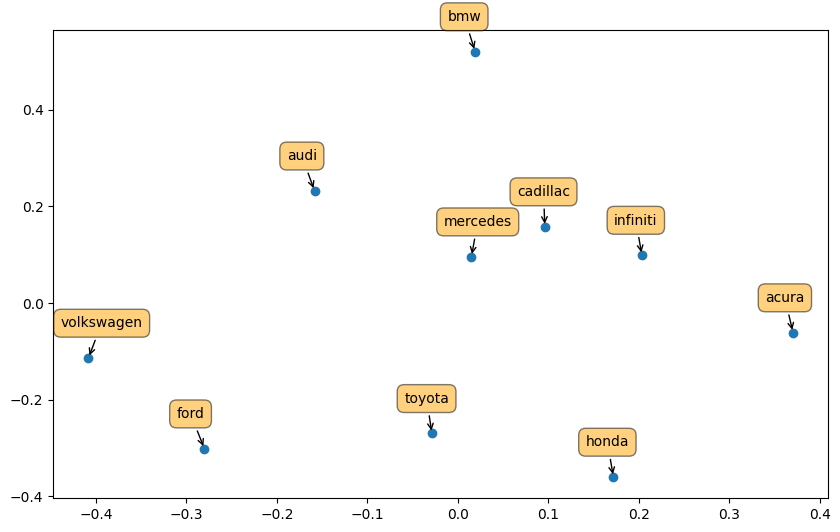

In [37]:
## Calculating the dissimilarity matrix which is the input for plotting MDS plot
# Compute the dissimilarity matrix using the reciprocal of lift values
dissimilarity_matrix = 1 / lift_data

# Replace infinite values with 0
dissimilarity_matrix.replace([np.inf, -np.inf], 0, inplace=True)

## Plotting MDS plot
# Import the necessary library
from sklearn import manifold

# Create an instance of MDS with specified parameters
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   random_state=3, dissimilarity="precomputed", n_jobs=1)

# Fit the MDS model to the dissimilarity matrix
results = mds.fit(dissimilarity_matrix)

# Get the coordinates of points in the MDS plot
coords = results.embedding_

# Create a scatter plot with annotations
plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom=0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker='o'
)

# Annotate points with brand labels
for label, x, y in zip(lift_data, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

# Display the plot
plt.show()

**TASK E**

*What insights can you offer to your client from your analyses in Tasks C and D*

At first glance, the MDS plot reveals significant associations among the luxury car brands Cadillac, Mercedes, and Infiniti. These brands are in a cluster on the plot, with short distances. This observation is cemented by the high corresponding lift values and aligns with our perceptions of Mercedes, Infiniti, and Cadillac all belonging to the luxury car category (in fact, an incredibly high lift value between Cadillac and Mercedes). The frequent co-mentions and associations between these brands are thus, expected.

Moreover, the plot shows close proximity between Toyota and Honda, as well as Volkswagen and Ford. These pairings are unsurprising given their shared classification as affordable car brands. However, what is surprising is the large distances (and smaller lifts) between Honda and Ford/Volkswagen. Despite both pairs being considered to be affordable brands, Honda is located closer to Mercedes, Infiniti, and Acura (luxury brands) than Volkswagen, and the corresponding lift values do not differ too significantly. This suggests that consumers are still cross-comparing car brands, beyond their ‘luxury’ status.

The link between Acura and Honda is more subtle in the MDS plot than in previous mentions. Acura exhibits associations with both the luxury and affordable car clusters; its smallest distances are to Honda (affordable brand) and Infiniti (luxury brand). It has very high lift values for both too. This is expected given Honda is the parent company of Acura. Honda introduced Acura in 1986 as a way to break into the luxury car market. Thus, by brand ownership, Acura and Honda should be associated, and by luxury market terms, Acura and Infiniti should also be associated.

In a similar vein, Audi and Volkswagen (VW) exhibit subtle associations with each other (both through distance in the MDS plot and high lift values), despite Audi being considered a luxury, and VW being considered affordable. While Audi is a brand owned by VW, it has very high lift values and short distances to other luxury brands. In particular, Audi shows strong associations with Mercedes and BMW. What is interesting is that all three of these brands are European brands. While Mercedes has strong lift associations with many of the top brands, there is an evident separation on the plot between luxury Asian brands (Acura, Infiniti) and luxury European brands.

It is worth noting that all of our inter-brand lift ratios exceed 1. This indicates that the associations between these brands are not coincidental, but rather that the presence of any one brand increases the likelihood of the presence of another.

**TASK F**

What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS plot for this question.

In [38]:
# Print the first 150 records
for word, frequency in freq_dist.most_common(150):
    print(f"{word}: {frequency}")

car: 2775
like: 1693
bmw: 1565
one: 1559
would: 1504
get: 1284
new: 1260
think: 1213
audi: 1147
even: 1010
3: 998
good: 955
well: 928
much: 927
time: 876
really: 859
know: 823
drive: 809
still: 792
acura: 774
years: 751
better: 750
2: 740
also: 737
could: 730
price: 712
go: 697
see: 696
4: 670
people: 654
back: 641
want: 639
way: 621
make: 613
5: 603
honda: 602
going: 578
say: 569
dealer: 568
many: 554
probably: 548
less: 539
year: 539
right: 531
lot: 528
sure: 524
nice: 521
miles: 515
engine: 509
toyotad: 506
something: 505
driving: 503
since: 502
got: 502
1: 499
take: 497
6: 493
first: 493
thing: 492
s4: 491
seems: 489
series: 484
used: 473
sport: 463
least: 462
look: 461
never: 447
buy: 438
model: 438
may: 432
sedan: 431
performance: 430
last: 429
need: 428
great: 426
point: 421
us: 418
money: 417
long: 416
awd: 411
pretty: 403
com: 401
seat: 401
old: 398
course: 398
every: 396
looking: 395
big: 394
maybe: 392
though: 390
around: 388
actually: 386
lease: 383
test: 382
two: 381
anoth

To establish the relationship between attributes and brands, we initially identified the top 5 attributes and brands through the following steps:

For the top 5 brands, we referred to Task B and selected the first 5 brands from the top 10 car brands list.

To identify the top 5 attributes, we utilized the code above, where we determined the five most frequent attributes among the hundred most common words, excluding stopwords. These attributes are stored in the "top_5_properties" variable.

After identifying these essential entities, we computed the lift values for the co-occurrence of attributes and brands.

**Note:** This time we used the parameters of 15 words.

In [ ]:
# This first code does not use parameters to find associations and lifts between words and brands

# import numpy as np

# # Create a copy of the data for analysis
# scraped = data.copy()

# # Define the top 5 brands and top 5 properties of interest
# top_5_brands = ['bmw','audi','acura','honda','infiniti']
# top_5_properties = ['price', 'engine', 'performance', 'luxury', 'awd']

# # Initialize an empty DataFrame to store lift values
# lift_table = pd.DataFrame(columns=top_5_properties, index=top_5_brands)

# # Loop through brands and properties to calculate lift values
# for i in range(len(top_5_brands)):
#     for j in range(len(top_5_properties)):
#         brand_count = 0
#         feature_count = 0
#         brand_with_feature_count = 0

#         # Iterate through comments to count brand, feature, and co-occurrence counts
#         for comment in scraped['MappedMessage']:
#             if top_5_brands[i] in comment:
#                 brand_count += 1
#                 if top_5_properties[j] in comment:
#                     brand_with_feature_count += 1
#             if top_5_properties[j] in comment:
#                 feature_count += 1

#         # Calculate lift value based on counts
#         lift = ((brand_with_feature_count * 6783) / (brand_count * feature_count))

#         # Store the lift value in the lift table
#         lift_table.loc[top_5_brands[i], top_5_properties[j]] = lift

# # Sort the lift table for better readability
# lift_table.sort_index(inplace=True)

# # Display the lift table
# lift_table

In [39]:
#This block of code uses the 15 word parameter:

import numpy as np

# Create a copy of the data for analysis
scraped = data.copy()

# Define the top 5 brands and top 5 properties of interest
top_5_brands = ['bmw', 'audi', 'acura', 'honda', 'infiniti']
top_5_properties = ['price', 'engine', 'performance', 'luxury', 'awd']

# Initialize an empty DataFrame to store lift values
lift_table = pd.DataFrame(columns=top_5_properties, index=top_5_brands)

# Loop through brands and properties to calculate lift values
for i in range(len(top_5_brands)):
    for j in range(len(top_5_properties)):
        brand_count = 0
        feature_count = 0
        brand_with_feature_count = 0

        # Iterate through comments to count brand, feature, and co-occurrence counts
        for comment in scraped['MappedMessage']:
          tokens = comment.split()  # assuming the comments are strings and not lists of tokens

          if top_5_brands[i] in tokens:
            brand_count += 1
            indices_brand = [index for index, word in enumerate(tokens) if word == top_5_brands[i]]

          if top_5_properties[j] in tokens:
            feature_count += 1
            indices_feature = [index for index, word in enumerate(tokens) if word == top_5_properties[j]]

          # Check for co-occurrence within the word limit
          if top_5_brands[i] in tokens and top_5_properties[j] in tokens:
            for index_a in indices_brand:
              found = False
              for index_b in indices_feature:
                if abs(index_a - index_b) <= 15:
                  brand_with_feature_count += 1
                  found = True
                  break
                if found:
                  break


        # Calculate lift value based on counts
        lift = ((brand_with_feature_count * len(scraped)) / (brand_count * feature_count))

        # Store the lift value in the lift table
        lift_table.loc[top_5_brands[i], top_5_properties[j]] = lift

# Sort the lift table for better readability
lift_table.sort_index(inplace=True)

# Display the lift table
lift_table


,price,engine,performance,luxury,awd
acura,0.677913,0.912513,0.714976,1.245097,2.26019
audi,1.172757,0.987551,0.79952,1.050245,1.87051
bmw,0.952787,0.784894,0.931261,0.747481,0.570549
honda,0.555579,0.798237,0.394622,0.801751,0.576667
infiniti,0.763207,0.951866,0.316224,0.794262,1.980438


In [40]:
attribute_frequency = pd.DataFrame(index = top_5_properties)

for i in range(len(top_5_properties)):
  for comment in scraped['MappedMessage']:
    if top_5_properties[i] in comment:
      feature_count += 1
  attribute_frequency.loc[top_5_properties[i], 'frequency'] = feature_count
print("The 5 most frequently mentioned attributes of cars in discussions:")
attribute_frequency

The 5 most frequently mentioned attributes of cars in discussions:


,frequency
price,1310.0
engine,1998.0
performance,2428.0
luxury,2798.0
awd,3222.0


**TASK G**

What advice will you give to your client from Task F?

**Observations for Attributes** <br>
***Breaking down lift values by attributes:*** <br>
Lift values for engine and lift for performance are low for every brand. This may indicate that consumers do not strongly associate any of these brands with performance and lift. This could also indicate that social media posts often talked about car attributes in isolation from any given brand. It may be that a large portion of posts talk about engine and performance without any mention to brands. In relative terms, BMW has significantly higher lift than other brands, more than tripling Infiniti’s lift value. That is, when performance is associated with a brand, it is most often BMW. Similarly, engine is most often associated with Audi.

Interestingly, Audi is the only brand with a lift value of above 1 for the price attribute. The three remaining luxury brands: Acura, BMW, and Infiniti all have lift values of below one. Moreover, Honda, the only economy-focused brand in the top-5 list, also has a lift value below one. To put this into words, consumers strongly associate price with Audi, but not the four remaining brands. This is particularly concerning for Honda, which is supposed to be an affordable brand. ‘Honda’ and ‘price’ appear together less often than expected under independence, and consumers do not associate price with the brand. Since we are assuming that all sentiments are positive, we can assume that Audi and price have strong consumer associations because Audi is offering their cars at a good price, considering their luxury status.

In terms of luxury, Acura and Audi are the only two brands with strong associations (lift values above one). Consumers do not strongly associate the exact word ‘luxury’ with BMW or Infiniti, despite both brands positioning themselves as luxury car brands. This should be a cause for concern - both of these brands are trying to position themselves as a luxury, and yet consumers do not place strong associations here. On the other hand, Honda does not have a high lift value with luxury either, but this is expected; Honda is instead positioned as an affordable car brand (unassociated with luxury), but its subsidiary brand, Acura, is successfully associated and positioned as a luxury brand.

Surprisingly, awd is the most common attribute, and Acura, Audi, and Infiniti all have strong associations (high lift values). The strongest association is with Acura.
<br> <br>
***Breaking down lift values by brand:***<br>
BMW does not have a lift value above one for any of the top 5 attributes. This either suggests that the brand focuses on other, more niche attributes, or is unsuccessful in its pursuit for consumers to immediately associate  price/engine/performance/luxury/awd with their brand. On the flip side, Audi has high lift values (and thus, associations) with three of the five top brand attributes: price, luxury, awd. This suggests that consumers believe Audi has strong associations with such attributes.
<br> <br>

### **Advice for the client based on Task F:**
The function of JD Power and Associates is not to market these car brands, but to provide analytics to businesses trying to better understand how consumers feel about their brand. Thus, we have split our suggested advice up by brand:
<br><br>
**Advice from JD Power and Associates to Acura:**
Acura has successfully positioned itself as a luxury brand, achieving high associations with the word luxury. This is particularly impressive given the four other most mentioned brands have lower lift values, and thus associations with luxury. Awd is Acura’s highest association, insinuating that consumers are associating the brand with all-wheel-drive vehicles. The brand could decide to capitalize on this, standardizing their cars to awd over fwd, and try to appeal to consumers shopping for an agenda of luxury, awd cars.
<br><br>
**Advice from JD Power and Associates to Audi:**
Audi has successfully positioned itself with the attributes: price, luxury, and awd. Ironically, consumers do not strongly associate any of the other cars with price. This could be a huge opportunity for Audi - they can uniquely appeal to consumers concerned with a good price but still wanting a luxury car. Notwithstanding, despite having a lift value of above 1 for luxury, Audi should be aware that there is actually a stronger association between luxury and Acura than there is between luxury and their own brand.
<br><br>
**Advice from JD Power and Associates to BMW:**
BMW is in tricky waters here: they fail to have any significant associations with the top five car attributes. They are the only luxury brand to be in this position. Though they sport a relative advantage in performannce amgonst top competitors, it is questionable whether this substantially assists BMW marketability as consumers do not seem to think of BMW whenever they think of performance. While BMW may have strong associations with other attributes that have not been analyzed, they need to try and market themselves more strongly on the most popular attributes we have filtered. As it appears right now, BMW fails to have a strong brand image, despite millions of dollars spent on marketing campaigns.
<br><br>
**Advice from JD Power and Associates to Honda:**
Despite being an affordable car brand, consumers do not positively associate Honda with the word ‘price.’ Perhaps consumers associate Honda with ‘cheap’ or ‘bargain,’ (unless further lift calculations are conducted we do not know), but in terms of the exact word ‘price,’ consumers fail to link the two together. As with BMW, Honda has not actually positioned itself strongly with any of our top five attributes. Consumers do not place strong associations with Honda and any attribute, and they need to remedy this if they are going to remain competitive.
<br><br>
**Advice from JD Power and Associates to Infiniti:**
Consumers strongly associate Infiniti with awd, but no other attribute that attests beyond the structure of their cars. More subjective descriptors like ‘luxury’ or ‘performance’ are not associated with Infiniti, despite positioning itself as a luxury brand. We suggest that Infiniti markets itself more strongly for another top five attribute, beyond awd if they want to better rival brands like Audi and Acura.





**Note:** There are so many ways we could have approached this question, and each approach would have given us a slightly different answer. For example, we could have created a dictionary which took into account all of the variations of different attributes (for example, price could have been a key, with 'prices, money, value-for-money...' and luxury could be a key with 'luxurious, plush, expensive, posh...') because there are so many ways in the English dictionary to say the same thing. If we had done this, and applied the dictionary to the comments we would have had far higher frequencies for each attribute and lift values. Notwithstanding, we avoided doing this because there are so many grey areas. For example, does 'expensive' and 'premium' become values for price or luxury? Does 'seatbelt' become an item in the keys interior or safety? Should awd have become an item in engine, which blurs the lines between 4wd, awd, and many more items?

**TASK H**

Which is the most aspirational brand in your data in terms of people actually wanting to buy or
own? Describe your analysis. What are the business implications for this brand?

We have created two lists of words/synonyms we feel represent 'aspirations', and combined them before looking at all of our comments to see if any contain these words/phrases.

In [41]:
aspiration_list_1 = ['desire', 'desirable', 'fancy', 'eager', 'like', 'love', 'dream', 'want', 'dream', 'cant wait to',
                     'love to', 'wish to', 'want to', 'aspire to', 'future car', 'thinking to buy', 'love to buy',
                     'want to own', 'love to own', 'like to own', 'have to own', 'nice to own', 'nice to buy', 'have to buy',
                     'would love to buy', 'wish to own', 'looking to buy', 'looking forward to buy', 'next car', 'winner', 'favor',
                     'prefer', 'promising', "bang for buck", 'go drive', 'go for', 'want', 'heart', 'dream to buy', 'buy',
                     'purchase', 'love', 'wanted', 'decided to', 'desire', 'desirable', 'go with', 'top car', 'better value',
                     'seriously look', 'anticipate', 'expect', 'would like to buy', 'would love to buy', 'eager to buy',
                     'love to have', 'desire of', 'dream of', 'dream to', 'love to', 'to own', 'own', 'favorite', 'always wanted']

aspiration_list_2 = ['wish to', 'hope to', 'want to', 'really want', 'prefer', 'dream car', 'dream of', 'aspire', 'looking for', 'looking to', 'would like', 'can afford', 'looking at',
                     'admiration', 'admire', 'ambition', 'ambitious', 'ardor', 'aspiration', 'aspire', 'beautiful', 'beauty', 'believe', 'best', 'bliss', 'blissful', 'breathtaking',
                     'catalyst', 'conquer', 'dare', 'daring', 'dedicate', 'desire', 'desiring', 'divine', 'dream', 'dream', 'eager', 'electrifying', 'empower', 'empowering',
                     'energized', 'envision', 'excellence', 'excellent', 'glory', 'happiness', 'happy', 'harmonious', 'harmony', 'holy', 'holy grail', 'honor', 'hope', 'ideal',
                     'imagination', 'imagine', 'initiative', 'innovation', 'inspire', 'inspiring', 'limitless', 'luxurious', 'nirvana', 'passion', 'passionate', 'purpose',
                     'relentless', 'spirit', 'spirited', 'strength', 'strong', 'trust', 'wish', 'worthy', 'crave', 'yearn for', 'intend to', 'goal is', 'seeking', 'ultimate',
                     'fantasize about', 'long for', 'aiming for', 'strive for', 'hungry for', 'covet', 'thirst for', 'set sights on', 'burning desire', 'passion for',
                     'fascinated by', 'enchanted by', 'spellbound by', 'allure', 'captivated by', 'obsession', 'in awe of', 'love to have', 'gotta have', 'cherish']

aspiration_list_combined = list(set(aspiration_list_1 + aspiration_list_2))

In [42]:
# Replaced all these aspirational phrases with the word 'aspiration' and calculated lift for this word against these brands in order to find the association.

taskh=data.copy()

def replace_aspirations(x):
    for word in aspiration_list_combined:
        x=x.replace(word,'aspiration')
    return x

taskh["message_with_aspirations"]= taskh['MappedMessage'].apply(lambda x: replace_aspirations(x))

In [43]:
aspiration_summary = pd.DataFrame(columns = ['brand', 'brand_count', 'aspiration_count', 'lift', 'aspiration_percent'])

aspiration_summary['brand'] = list(top10_car_brands['brand'])

total_aspiration_count = 0
total_comments = len(taskh)

for comment in taskh['message_with_aspirations']:
    if 'aspiration' in comment:
        total_aspiration_count += 1

for brand in aspiration_summary['brand']:
    brand_count = 0
    aspiration_per_brand_count = 0
    for comment in taskh['message_with_aspirations']:
        if brand in comment:
            brand_count += 1
        if 'aspiration' in comment and brand in comment:
            aspiration_per_brand_count += 1
    aspiration_summary.loc[aspiration_summary['brand'] == brand, 'brand_count'] = brand_count
    aspiration_summary.loc[aspiration_summary['brand'] == brand, 'aspiration_count'] = aspiration_per_brand_count

aspiration_summary['aspiration_percent'] = aspiration_summary['aspiration_count']/aspiration_summary['brand_count']
aspiration_summary['lift'] = (total_comments*aspiration_summary['aspiration_count'])/(aspiration_summary['brand_count']*total_aspiration_count)
aspiration_summary.sort_values(by = 'lift')

,brand,brand_count,aspiration_count,lift,aspiration_percent
5,volkswagen,368,270,1.294656,0.733696
0,bmw,1597,1172,1.294974,0.733876
8,cadillac,284,210,1.304786,0.739437
2,acura,825,612,1.308989,0.741818
1,audi,1374,1031,1.324068,0.750364
9,ford,346,266,1.356576,0.768786
6,toyota,1696,1308,1.360882,0.771226
4,infiniti,380,295,1.369862,0.776316
3,honda,834,667,1.411231,0.79976
7,mercedes,286,237,1.462247,0.828671


As this table shows, all of our brands have lift values above 1, however, our highest aspirational brand is Mercedes. Mercedes has the strongest association with aspiration-related words, meaning that consumers most frequently use words like 'wish' and 'aspire' with 'Mercedes.' It can therefore be inferred that more consumers wish to own a Mercedes than any other brand. The implications for Mercedes is that, if they continue to capitalize on this 'prestige appeal,' they could continue to enjoy high profit margins. Also, Mercedes being the most aspirational brand shows that there is strong consumer demand for their brand and their cars are thought of very highly. The possible growth opportunity that this insight provides is that aspirational posts mean that consumers would like to own a Mercedes, not necessarily that they already own one. This points to a potential future customer base, so Mercedes needs to focus on converting these ‘potential’ Mercedes owners into real Mercedes drivers.

***Summary***

- From the lift table presented, it's evident that 'Mercedes' stands out as the most coveted brand, boasting both the highest lift and the top aspiration percentage.

- Following Mercedes, Honda and Toyota secure their positions. This aligns with general perceptions, given the significant market share Honda and Toyota command due to their commendable quality and competitive pricing.

- Volkswagen's diminished desirability is a concern. Given that it isn't an American brand, this could potentially explain the observed outcomes.

- Surprisingly, BMW registers a low aspiration score. This is unexpected, especially considering BMW's widespread popularity; one would anticipate more favorable results for the brand.